# Integration TIMES-ENBIOS

This jupyter notebook shows an example of the integration between [Times](https://iea-etsap.org/index.php/etsap-tools/model-generators/times) outputs and environmental analysis using [ENBIOS](https://github.com/LIVENlab/enbios). 

We will use [Sparks](https://github.com/LIVENlab/Sparks) to soft-link both models. 




## Define a basefile
The basefile will map the lifecycle inventories (LCI) to be used in ENBIOS, as well as the hierarchical structure to follow.

In this exercice, we are going to analyze the electricity production output, distinguishing between `baseload` technologies and `intermittent`.


In [2]:
import pandas as pd

df = pd.read_excel(r'testing/data_test/Times_ecoinvent.xlsx')

df.head()


,Processor,Parent_Processor,TIMES PROCESS DESCRIPTION,Carrier,TIMES Unit,TIMESToEcoinventFactor,EcoinventCarrierName,Ecoinvent Activity,Ecoinvent Location,Ecoinvent unit,ISIC,Ecoinvent_key_code,Factor,Comments,Unnamed: 14
0,CHPAGRBGS00,Baseload,CHP.AGR.BGS.00,ELCHIG,PJ,277800000000,"electricity, high voltage","heat and power co-generation, biogas, gas engine",ES,kilowatt hour,3821:Treatment and disposal of non-hazardous w...,"('ei36_cutoff_IMAGE_SSP2_SS', '4de25bf8baf97e6...",2.777778e+08,NaN,NaN
1,CHPAGRBGS00,Baseload,CHP.AGR.BGS.00,HEAT,PJ,1000000000,"heat, central or small-scale, other than natur...","heat and power co-generation, biogas, gas engine",ES,megajoule,3821:Treatment and disposal of non-hazardous w...,"('ei36_cutoff_IMAGE_SSP2_SS', '6defc436144d3d5...",1.000000e+09,NaN,NaN
2,CHPAGRBGSREP01,Baseload,CHP.AGR.BGS.REP.01,ELCHIG,PJ,277800000000,"electricity, high voltage","heat and power co-generation, biogas, gas engine",ES,kilowatt hour,3821:Treatment and disposal of non-hazardous w...,"('ei36_cutoff_IMAGE_SSP2_SS', '4de25bf8baf97e6...",2.777778e+08,NaN,NaN
3,CHPAGRBGSREP01,Baseload,CHP.AGR.BGS.REP.01,HEAT,PJ,1000000000,"heat, central or small-scale, other than natur...","heat and power co-generation, biogas, gas engine",ES,megajoule,3821:Treatment and disposal of non-hazardous w...,"('ei36_cutoff_IMAGE_SSP2_SS', '6defc436144d3d5...",1.000000e+09,NaN,NaN
4,CHPAGRBIO00,Baseload,CHP.AGR.BIO.00,ELCHIG,PJ,277800000000,"electricity, high voltage","heat and power co-generation, wood chips, 6667...",ES,kilowatt hour,3530:Steam and air conditioning supply,"('ei36_cutoff_IMAGE_SSP2_SS', 'cc7b47e491ad9fc...",2.777778e+08,NaN,NaN


## Sparks
Sparks helps to soft-link the energy system data with ENBIOS, following the instructions defined on the basefile.
Define the path to the `basefile`, `energy data` (TIMES outputs'), along with a `Brightway project` and `Database`. It will also adapt the units to match TIMES and Ecoinvent data.

In [3]:
from Sparks.util.base import SoftLink
import bw2data as bd

enbios_mod = SoftLink(r'testing\data_test\ElectricgenerationTIMES-Sinergia.xlsx',
                      r'testing\data_test\Times_ecoinvent.xlsx',
                       'Seeds_exp4',
                      'db_experiments')

enbios_mod.preprocess(subregions=False)


Project and Database existing...
Adapting input data...


C:\Users\altz7\PycharmProjects\ENBIOS4TIMES_\Sparks\util\preprocess\cleaner.py:124: Warning: 
The following technologies, are present in the energy data but not in the Basefile: 
            
{'CHPGENRES00', 'EUGTBGS00', 'EUGASCOG', 'EUGTBGS01', 'ESTBATS101', 'IMPELCHIGA', 'UPSELCHIGOL00', 'EUGTOILGAS00', 'EUCCFUELTNP00', 'EUGTBGSREPOW01', 'EUSTWOO00'}
            
 Please,check the following items in order to avoid missing information
  warnings.warn(message,Warning)
C:\Users\altz7\PycharmProjects\ENBIOS4TIMES_\Sparks\generic\generic_dataclass.py:50: Warning: 
972e398cc52b4431770c512aaa67b278_copy1 not found in the database. Please check your database / basefile.
This activity won't be included.
  warnings.warn(message, Warning)
C:\Users\altz7\PycharmProjects\ENBIOS4TIMES_\Sparks\generic\generic_dataclass.py:50: Warning: 
d65e09be05273e10d350c96a37998e4b_copy1 not found in the database. Please check your database / basefile.
This activity won't be included.
  warnings.warn(message, Wa

function preprocess executed in 0.25455260276794434 seconds


Sparks will notify missing technologies in the basefile, as well as possible problems in the definition of the database.
Check the excluded technologies with the following example


In [4]:
enbios_mod.exluded_techs_and_regions

{'CHPGENRES00',
 'ESTBATS101',
 'EUCCFUELTNP00',
 'EUGASCOG',
 'EUGTBGS00',
 'EUGTBGS01',
 'EUGTBGSREPOW01',
 'EUGTOILGAS00',
 'EUSTWOO00',
 'IMPELCHIGA',
 'UPSELCHIGOL00'}

You can also check the conversion process

In [5]:
enbios_mod.preprocessed_units


,Commodity,Process,scenarios,flow_out_sum,alias_carrier,flow_out_sum_,new_units,aliases
0,ELCHIG,CHPAGRBGS00,def_hydro1,0.162997,CHPAGRBGS00_ELCHIG,4.528060e+10,kilowatt hour,CHPAGRBGS00__ELCHIG
1,ELCHIG,CHPAGRBGSREP01,def_hydro1,0.189641,CHPAGRBGSREP01_ELCHIG,5.268224e+10,kilowatt hour,CHPAGRBGSREP01__ELCHIG
2,ELCHIG,CHPAGRBIO00,def_hydro1,0.012481,CHPAGRBIO00_ELCHIG,3.467138e+09,kilowatt hour,CHPAGRBIO00__ELCHIG
3,ELCHIG,CHPAGRBIOREP01,def_hydro1,0.014521,CHPAGRBIOREP01_ELCHIG,4.033882e+09,kilowatt hour,CHPAGRBIOREP01__ELCHIG
4,ELCHIG,CHPAGRGAS00,def_hydro1,21.522390,CHPAGRGAS00_ELCHIG,5.978920e+12,kilowatt hour,CHPAGRGAS00__ELCHIG
...,...,...,...,...,...,...,...,...
67,ELCHIG,EUWINOF201,def_hydro1,181.570416,EUWINOF201_ELCHIG,5.044026e+13,kilowatt hour,EUWINOF201__ELCHIG
68,ELCHIG,EUWINOFREPOW201,def_hydro1,4.040089,EUWINOFREPOW201_ELCHIG,1.122337e+12,kilowatt hour,EUWINOFREPOW201__ELCHIG
69,ELCHIG,EUWINON201,def_hydro1,703.337998,EUWINON201_ELCHIG,1.953873e+14,kilowatt hour,EUWINON201__ELCHIG
70,ELCHIG,EUWINON501,def_hydro1,1023.605741,EUWINON501_ELCHIG,2.843577e+14,kilowatt hour,EUWINON501__ELCHIG


In [6]:
enbios_mod.data_for_ENBIOS(smaller_vers=True,
                           path_save=r'test2.json')



Input data for ENBIOS created


In [7]:
enbios_mod.enbios2_data

{'adapters': [{'adapter_name': 'brightway-adapter',
   'config': {'bw_project': 'Seeds_exp4'},
   'methods': {'GWP1000': ['ReCiPe 2016 v1.03, midpoint (H)',
     'climate change',
     'global warming potential (GWP1000)'],
    'LOP': ['ReCiPe 2016 v1.03, midpoint (H)',
     'land use',
     'agricultural land occupation (LOP)'],
    'WCP': ['ReCiPe 2016 v1.03, midpoint (H)',
     'water use',
     'water consumption potential (WCP)'],
    'FEP': ['ReCiPe 2016 v1.03, midpoint (H)',
     'eutrophication: freshwater',
     'freshwater eutrophication potential (FEP)'],
    'SOP': ['ReCiPe 2016 v1.03, midpoint (H)',
     'material resources: metals/minerals',
     'surplus ore potential (SOP)']}}],
 'hierarchy': {'name': 'Energysystem',
  'aggregator': 'sum',
  'children': [{'name': 'Generation',
    'aggregator': 'sum',
    'children': [{'name': 'Baseload',
      'aggregator': 'sum',
      'children': [{'name': 'CHPAGRBGS00__ELCHIG',
        'adapter': 'bw',
        'config': {'code': '4d

 If you want to check the structure of this file, you can use the following [JSON schema](https://github.com/LIVENlab/enbios/blob/main/data/schema/experiment.schema.gen.json) and a [validator](https://www.jsonschemavalidator.net/) 

## Run ENBIOS
Now that we have transformed the energy data into an ENBIOS-like format, let's run some experiments!
Pass the `path` to the json file that generated using Sparks

In [9]:

import enbios as enb
import json


exp = enb.Experiment(r'test2.json')
exp.run()




2025-02-26 13:33:47,843 - ............enbios.base - INFO - Running scenario 'def_hydro1'


{'def_hydro1': {'name': 'Energysystem',
  'results': {'GWP1000': {'unit': 'kg CO2-Eq', 'magnitude': 509803091068436.3},
   'LOP': {'unit': 'm2*a crop-Eq', 'magnitude': 17716236708772.082},
   'WCP': {'unit': 'cubic meter', 'magnitude': 6928428138974.544},
   'FEP': {'unit': 'kg P-Eq', 'magnitude': 121794684385.60413},
   'SOP': {'unit': 'kg Cu-Eq', 'magnitude': 6970625003184.134}},
  'output': [{'unit': 'kilowatt_hour',
    'magnitude': 2610618292470812.0,
    'label': None}],
  'children': [{'name': 'Generation',
    'results': {'GWP1000': {'unit': 'kg CO2-Eq',
      'magnitude': 509803091068436.3},
     'LOP': {'unit': 'm2*a crop-Eq', 'magnitude': 17716236708772.082},
     'WCP': {'unit': 'cubic meter', 'magnitude': 6928428138974.544},
     'FEP': {'unit': 'kg P-Eq', 'magnitude': 121794684385.60413},
     'SOP': {'unit': 'kg Cu-Eq', 'magnitude': 6970625003184.134}},
    'output': [{'unit': 'kilowatt_hour',
      'magnitude': 2610618292470812.0,
      'label': None}],
    'children': 

Save the results


In [14]:
results_dict=exp.result_to_dict()
results_csv = exp.results_to_csv('output.csv')

df = pd.read_csv('output.csv')
df.head()

,level,lvl_0,lvl_1,lvl_2,lvl_3,results_GWP1000_unit,results_GWP1000_magnitude,results_LOP_unit,results_LOP_magnitude,results_WCP_unit,results_WCP_magnitude,results_FEP_unit,results_FEP_magnitude,results_SOP_unit,results_SOP_magnitude,output_0_unit,output_0_magnitude,output_0_label,bw_activity_code
0,0,Energysystem,NaN,NaN,NaN,kg CO2-Eq,5.098031e+14,m2*a crop-Eq,1.771624e+13,cubic meter,6.928428e+12,kg P-Eq,1.217947e+11,kg Cu-Eq,6.970625e+12,kilowatt_hour,2.610618e+15,NaN,NaN
1,1,NaN,Generation,NaN,NaN,kg CO2-Eq,5.098031e+14,m2*a crop-Eq,1.771624e+13,cubic meter,6.928428e+12,kg P-Eq,1.217947e+11,kg Cu-Eq,6.970625e+12,kilowatt_hour,2.610618e+15,NaN,NaN
2,2,NaN,NaN,Baseload,NaN,kg CO2-Eq,4.353944e+14,m2*a crop-Eq,4.286019e+12,cubic meter,5.500815e+12,kg P-Eq,8.894405e+10,kg Cu-Eq,2.192524e+12,kilowatt_hour,1.045511e+15,NaN,NaN
3,3,NaN,NaN,NaN,CHPAGRBGS00__ELCHIG,kg CO2-Eq,4.218420e+10,m2*a crop-Eq,3.772448e+08,cubic meter,1.136056e+07,kg P-Eq,1.880952e+06,kg Cu-Eq,6.280294e+07,kilowatt_hour,4.528060e+10,NaN,4de25bf8baf97e6cdaf2b4d4721a71a4
4,3,NaN,NaN,NaN,CHPAGRBGSREP01__ELCHIG,kg CO2-Eq,4.907969e+10,m2*a crop-Eq,4.389098e+08,cubic meter,1.321758e+07,kg P-Eq,2.188415e+06,kg Cu-Eq,7.306880e+07,kilowatt_hour,5.268224e+10,NaN,4de25bf8baf97e6cdaf2b4d4721a71a4


,scenario,GWP1000,LOP,WCP,FEP,SOP
0,def_hydro1,5.098031e+14,1.771624e+13,6.928428e+12,1.217947e+11,6.970625e+12


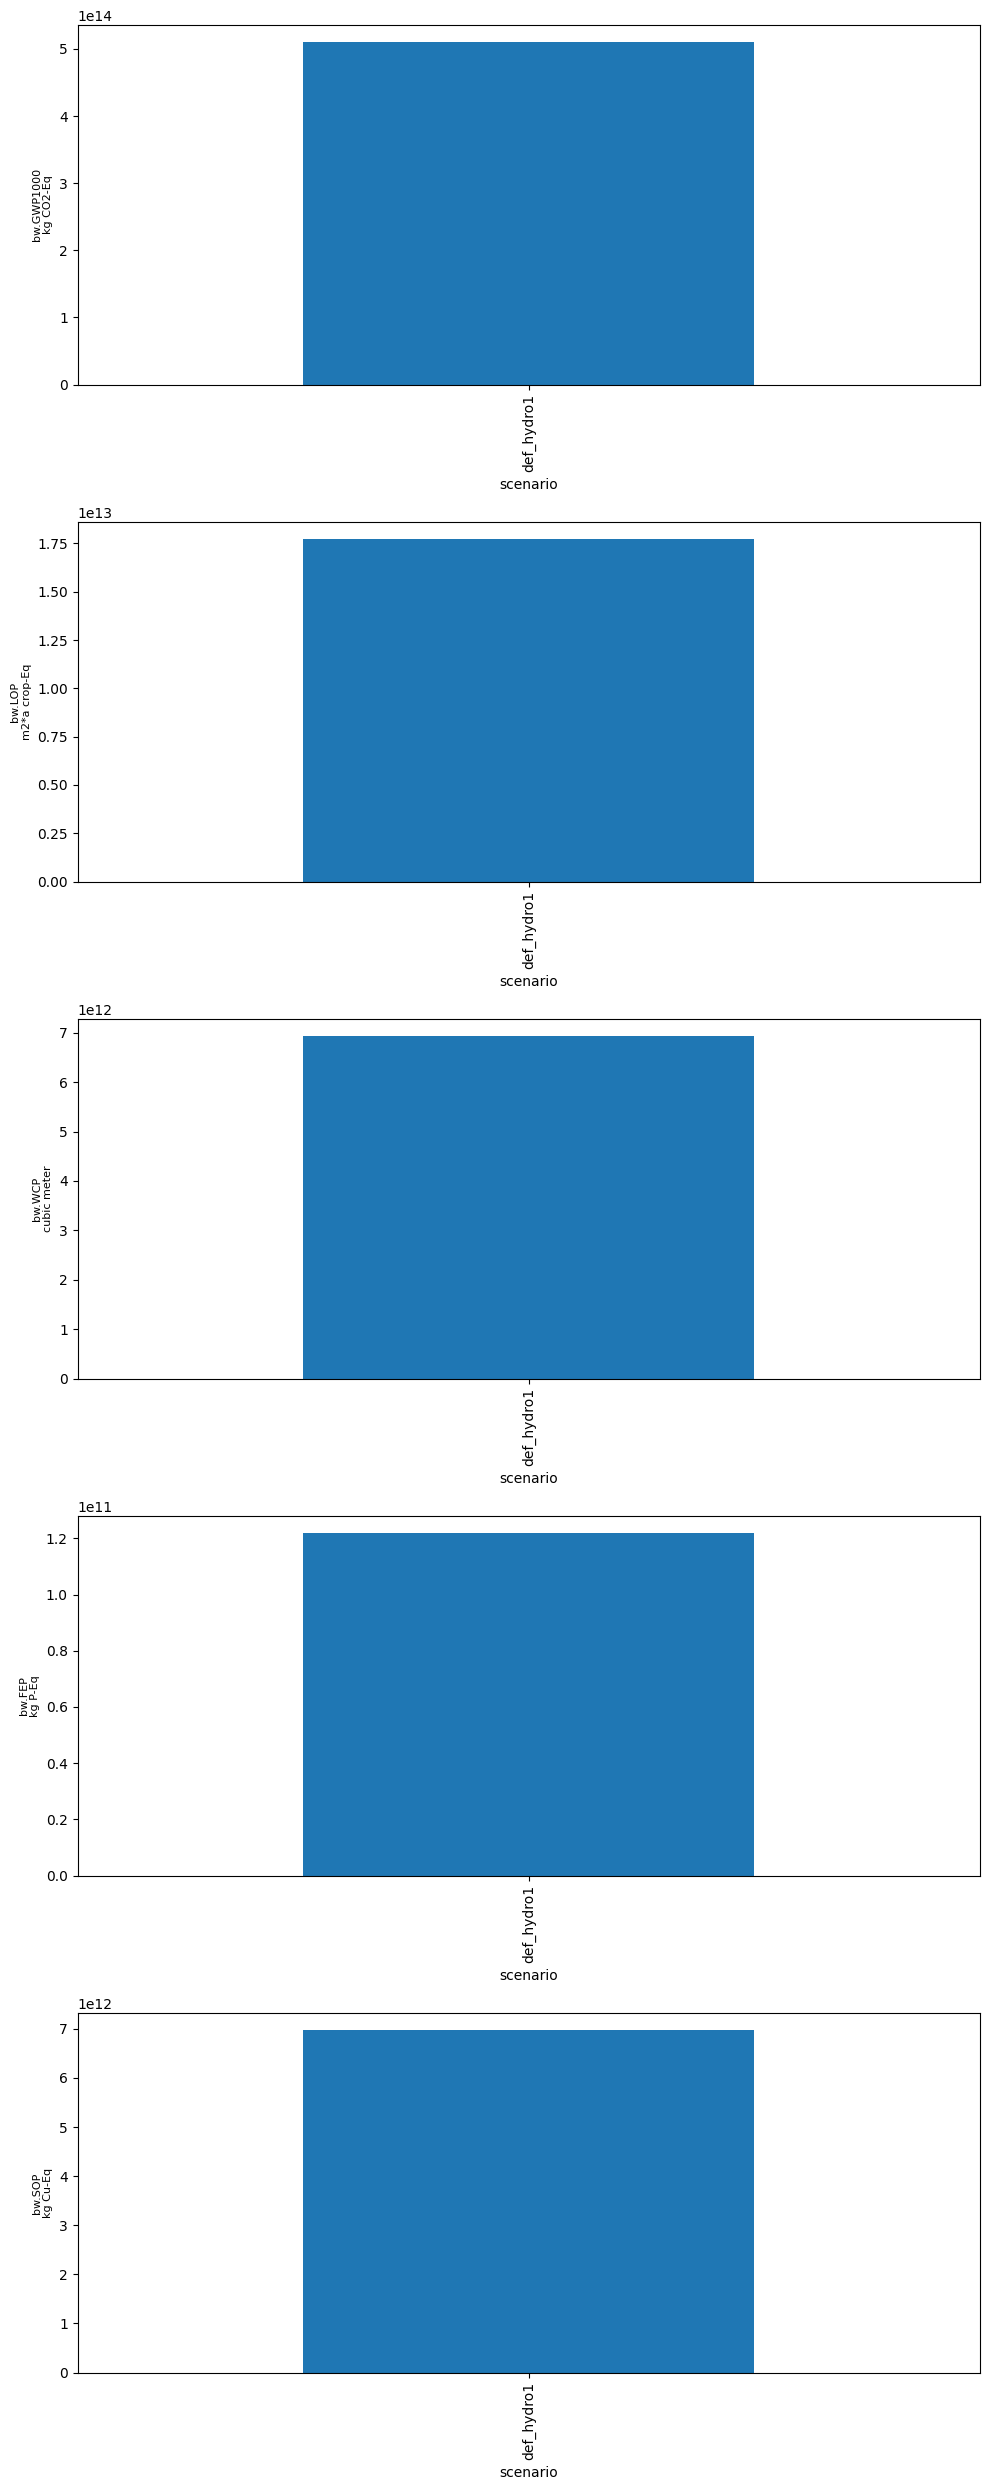

In [16]:
from enbios.base.result_select import ResultsSelector
from enbios.base.plot_experiment import bar_plot

# We will only see one scenario
rs = ResultsSelector.get_result_selector(exp)
bar_plot(exp)
rs.base_df

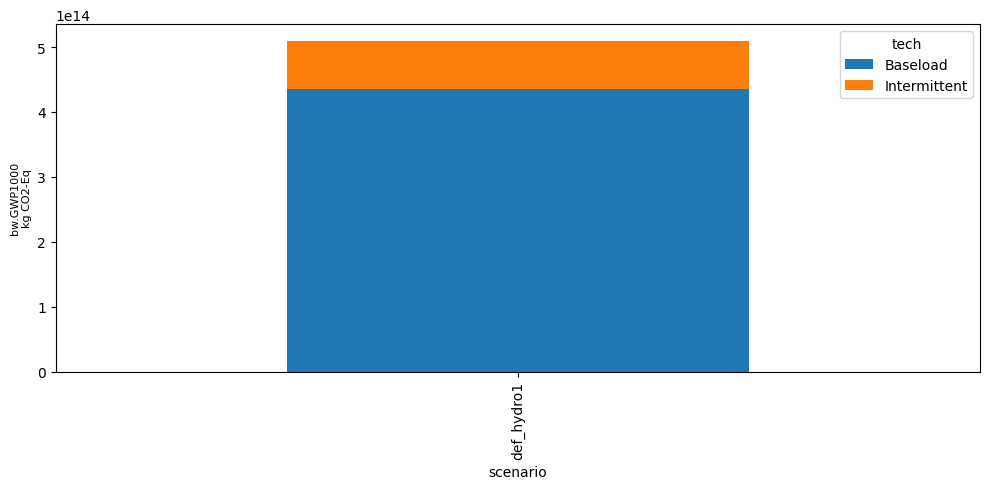

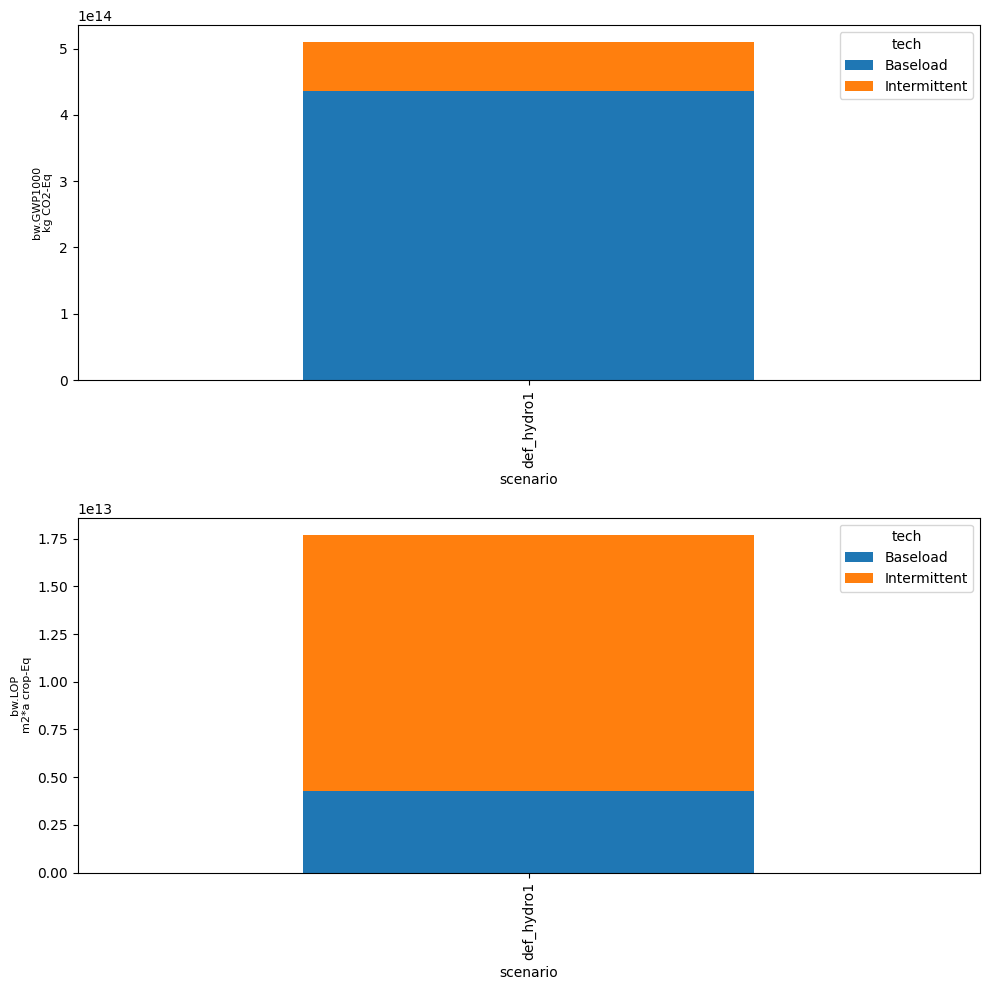

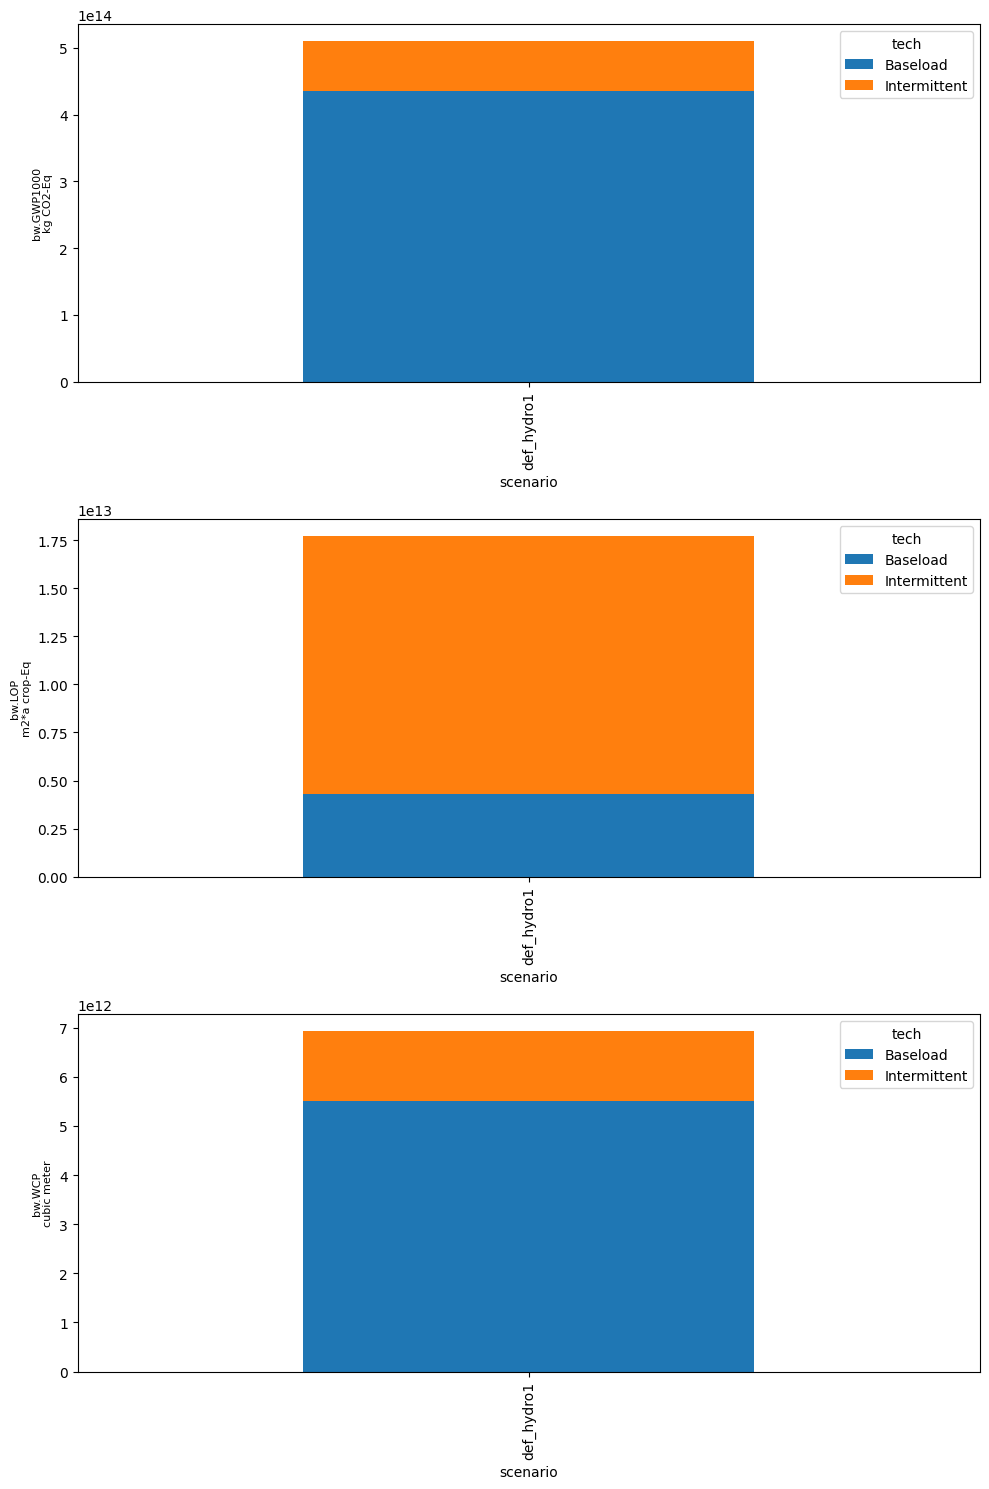

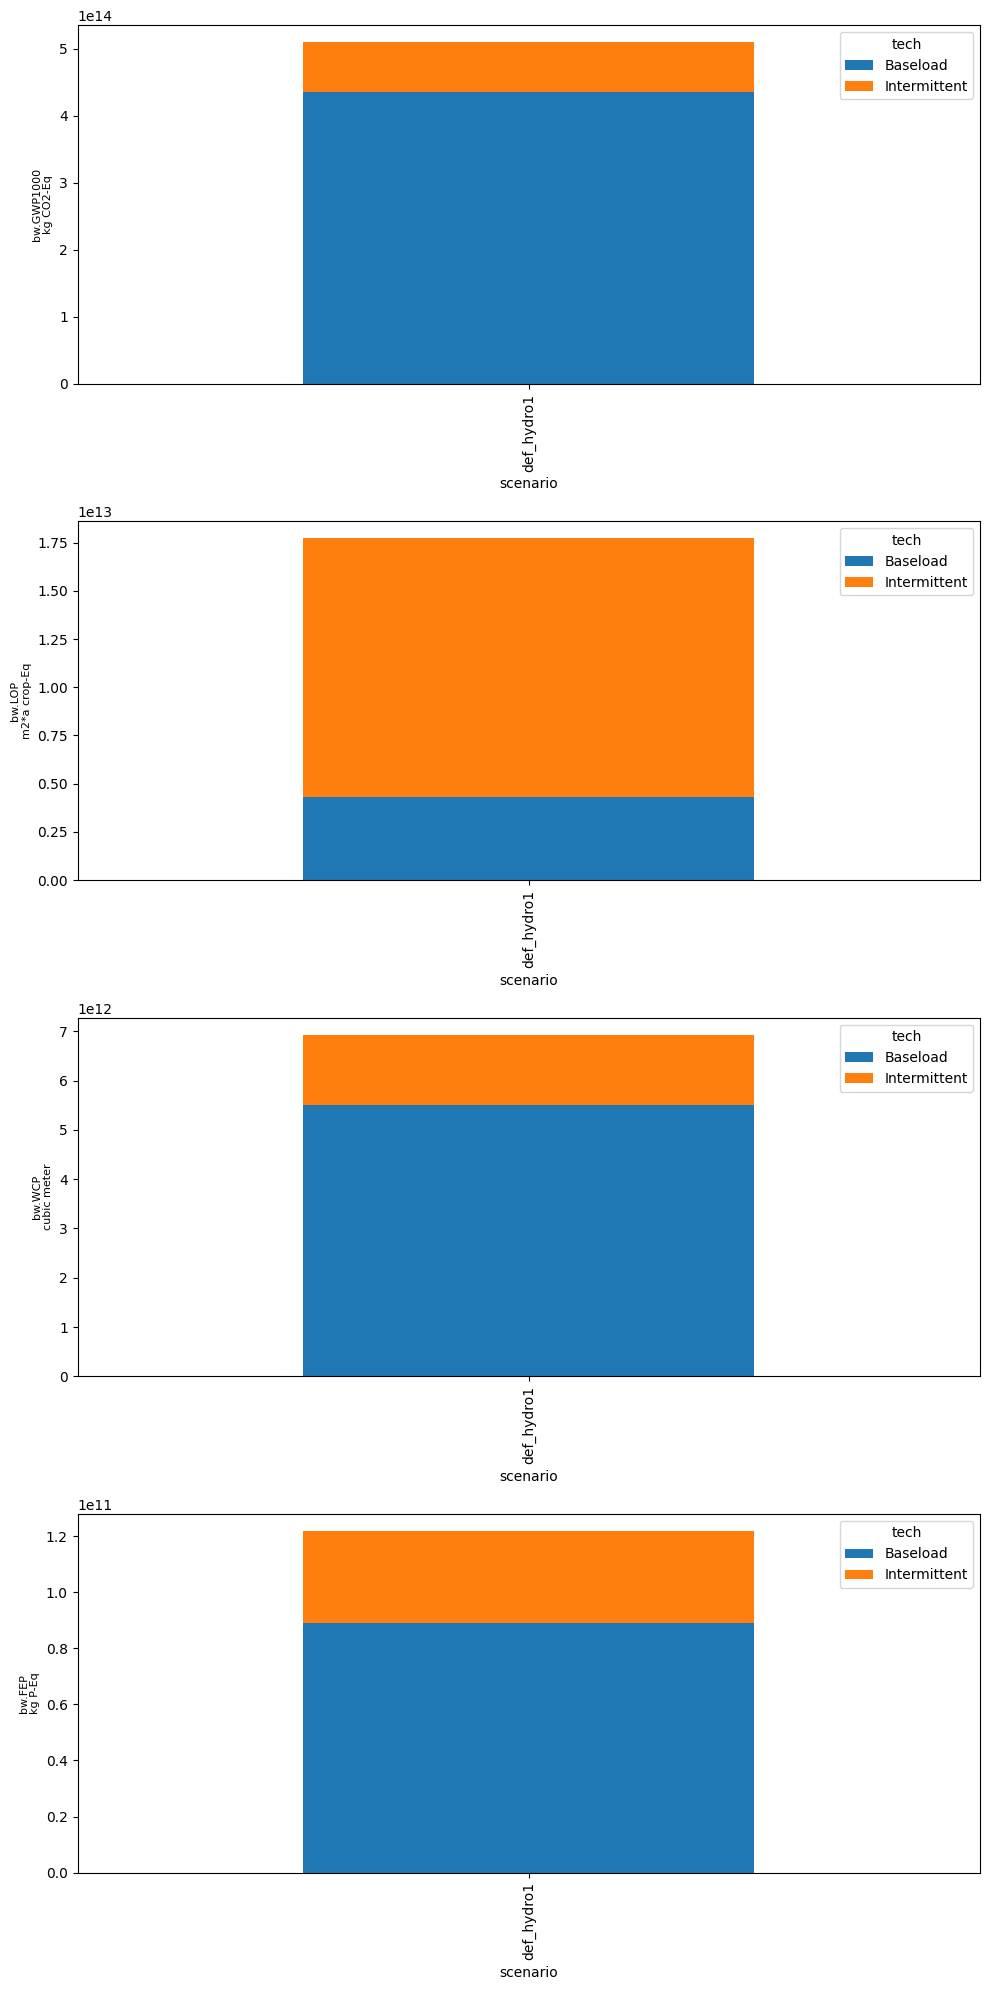

In [38]:
from enbios.base.plot_experiment import stacked_bar_plot
for method in range (len(exp.method_names)):
   
    if method > 0:
        stacked_bar_plot(exp, methods=exp.methods[:method], level=2)
    #stacked_bar_plot(exp, methods = exp.methods[:method],level=2)



C:\Users\altz7\PycharmProjects\ENBIOS4TIMES_\sparks_2\lib\site-packages\enbios\base\plot_experiment.py:87: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


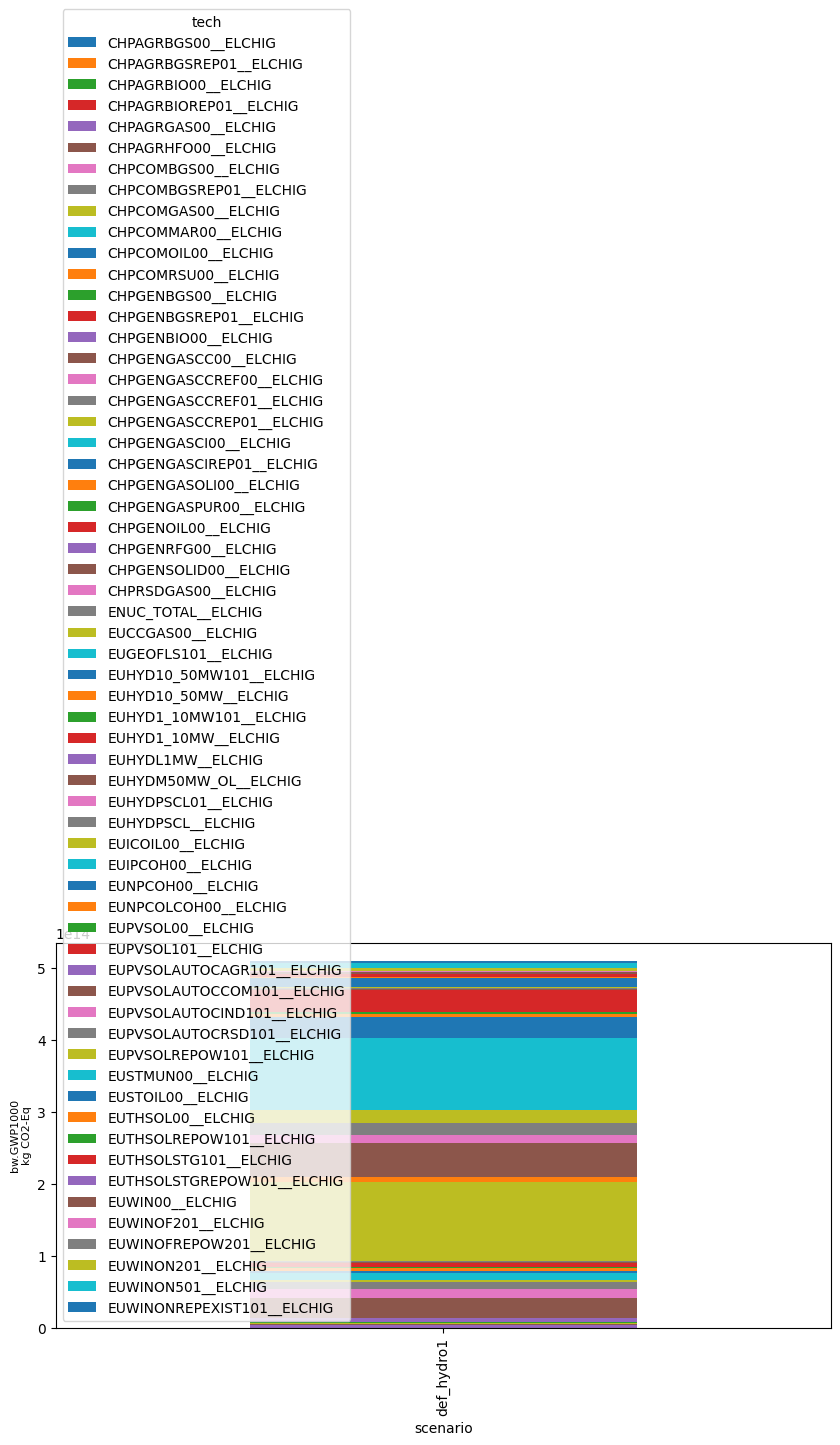

In [39]:
stacked_bar_plot(exp, methods=exp.methods[:1], level=3);